<a href="https://colab.research.google.com/github/jrebull/NLP/blob/main/Team18_MNA_NLP_semana_7y8_Actividad_7_2_Modelado_de_Texto_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Somos el Equipo de los SIHINOS
 Arranca la aventura a Javilandia en la Jarconavegación acompañado de la Monshemagia ...esto se pondrá intenso...D:


⏰⏰⏰⏰⏰⏰⏰⏰⏰⏰⏰⏰⏰⏰⏰⏰⏰⏰⏰

# Tocando La Sihinilibreta v0

Log de Cambios

### 2025-Mayo-25 - Javihino 11 horas Mexico time - Se Crea la Libreta en blanco



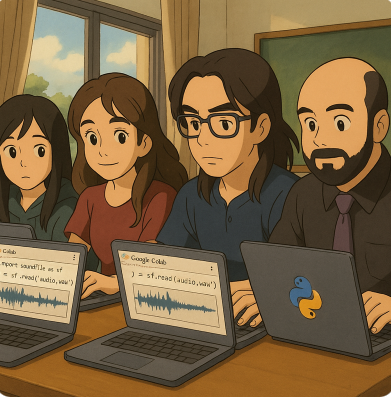

# ✨ **Actividad 4 Tarea: Audio-a-Texto con LDA y LLM** ✨
## 7.2 Actividad Semanas 7 y 8: Modelado de Tópicos y Modelos de Gran Tamaño - Audio-2-Texto
---
---

## 🗓️ **Información General**
> **Fecha de Entrega:** Lunes, 09 de Junio de 2025
>
> **Versión del Documento:** `v1.0`

---
---

## 👥 **Autores del Proyecto**

> ### 👨‍💻 **Juan Carlos Pérez Nava**
> `A01795941`
>
> ### 👨‍💻 **Javier Augusto Rebull Saucedo**
> `A01795838`
>
> ### 👩‍💻 **Sihiní Trinidad Sánchez**
> `A00889358`
>
> ### 👩‍💻 **Iris Monserrat Urbina Casas**
> `A01795999`

---
---

## 👨‍🏫 **Supervisión Académica**
> **Profesor Tutor:**
>
> Rodolfo Miguel Gameros Leal

> **Profesor Titular:**
>
> Luis Eduardo Falcón Morales

---
---

# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad Semana 7 y 8

### **Modelado de Tópicos y Modelos de Gran Tamaño - Audio-2-Texto**

---

## Objetivos

Aplicar técnicas no supervisadas de modelado de temas con LDA y en combinación con modelos Transformer LLM, generar información sintetizada a partir del texto extraído de archivos de audio.

El análisis de documentos (texto, audio, video, etc) es actualmente una de las tareas más importantes dentro del área de procesamiento de texto. En particular, cuando la cantidad de información es muy grande, el complemento de técnicas de modelado de tópicos con LLM es muy recurrida, ya que nos permite optimizar recursos. En esta actividad no tenemos estrictamente una gran cantidad de datos, pero nos muestra la manera en que información de audio puede complementarse con técnicas como LDA para resumir o sintetizar información y aún así, recuperarla posteriormente y hasta cierto grado, con modelos transformer LLM.

## Temas:
* Análisis de modelación de tópicos (LDA - Asignación Latente de Dirichlet)
* Modelos de Gran Tamaño (LLM)

---

# Instrucciones

En esta semana estaremos trabajando con datos de archivos de audio de dominio público.
La actividad se entrega dentro de dos semanas y es por equipos.
En particular, veremos la manera en que técnicas de modelación semántica latente se pueden complementar con modelos LLM.

Atiende los siguientes pasos para la actividad de estas semanas 7 y 8:

1.  Descarga el archivo de con las instrucciones de la actividad: `MNA_NLP_Actividad_LDA_LLM_audio2texto.pdf`
2.  En esta actividad deberás utilizar algunos de los archivos de audio del proyecto Gutenberg: [https://www.gutenberg.org/](https://www.gutenberg.org/)
3.  Una vez terminada la actividad, deberán subir el archivo de JupyterNotebook a GitHub con el nombre indicado en la sección "Especificaciones de entrega", de más abajo.
4.  Dentro de Canvas, en esta página de la actividad, deberán incluir solamente la liga a tu archivo de la actividad en GitHub.

El siguiente cuaderno de Jupyter muestra algunos ejemplos para extraer el texto de un audio, pero no tienes que limitarte a estos, en dado caso:
`MNA_NLP_modelos_audio2txt.ipynb`

La presente actividad se realiza en equipos y utiliza como datos de entrada archivos de
audio con algunas de las fábulas de Esopo en idioma español.

Deberán considerar los siguientes puntos:

In [1]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:

!pip install gdown

import gdown
import os

from IPython.display import Audio, display
import ipywidgets as widgets

print('\n\n')
print("📚✅ ¡Librerías cargadas y listas para la acción! 🚀")
print('\n\n')




📚✅ ¡Librerías cargadas y listas para la acción! 🚀





## Ejercicio 1:

* Los audios son del dominio público tomados de la página del proyecto Gutenberg y los encuentran en la siguiente liga:
    [https://www.gutenberg.org/ebooks/21144](https://www.gutenberg.org/ebooks/21144)
* Del total de fábulas que hay en dicha página (30 diferentes), solamente deberán trabajar con los siguientes 10 audios:
    * 1, 4, 5, 6, 14, 22, 24, 25, 26, 27.
* Todos los audios son en español, aunque con diferentes acentos de personas de habla hispana y uno de ellos de una persona no nativa de habla hispana (el audio 25). De preferencia usar los archivos de audio en formato MP3; pero en dado caso pueden usar el formato Apple iTunes si usas Mac y se les facilita su manejo. Cada audio tiene una duración aproximada de 1 minuto. Indiquen el tipo de formato que utilizaron.
* De cada archivo de audio deberán extraer el texto en español.
    * Todos los audios comienzan y terminan con el mismo contenido. Inician con “las fábulas de Esopo … fábula número ##”. Y terminan con “fin de la fábula, esta grabación …”. Este inicio y final de texto deberás eliminarlos para que no sean parte del análisis que realizarán.

<div style="background-color: #eef1f5; border-left: 6px solid #4a90e2; margin-bottom: 20px; padding: 10px 20px; border-radius: 8px;">
  <h2 style="color: #333; font-family: 'Segoe UI', 'Helvetica Neue', Arial, sans-serif; font-weight: 600;">
    Audios en Formato MP3 descargados de
    <a href="https://www.gutenberg.org/ebooks/21144" target="_blank" style="color: #4a90e2; text-decoration: none; font-weight: normal;">
      gutenberg.org/ebooks/21144
    </a>
  </h2>
</div>

<style>
  .elegant-audio-table {
    width: 100%;
    border-collapse: separate; /* Changed for rounded corners */
    border-spacing: 0; /* Required for separate */
    margin-top: 25px;
    font-family: 'Segoe UI', 'Helvetica Neue', Arial, sans-serif;
    box-shadow: 0 4px 8px rgba(0,0,0,0.1);
    border-radius: 8px; /* Rounded corners for the table */
    overflow: hidden; /* Ensures content respects border-radius */
  }
  .elegant-audio-table th, .elegant-audio-table td {
    padding: 15px 18px; /* Increased padding */
    text-align: left;
    border-bottom: 1px solid #dde2e7; /* Lighter border */
  }
  .elegant-audio-table th {
    background-color: #4a90e2; /* Primary accent color */
    color: white;
    font-weight: 600;
    font-size: 1em;
    text-transform: uppercase; /* Uppercase headers */
    letter-spacing: 0.5px;
  }
  .elegant-audio-table td {
    background-color: #ffffff;
    color: #333;
    font-size: 0.95em;
  }
  .elegant-audio-table tr:last-child td {
    border-bottom: none; /* Remove border for the last row */
  }
  .elegant-audio-table tr:hover td {
    background-color: #f5f7fa; /* Subtle hover effect */
  }
  .elegant-audio-table td:nth-child(1) { /* File name */
    font-weight: 500;
    color: #2c3e50;
  }
  .elegant-audio-table td:nth-child(2) { /* Fable title */
    color: #555;
  }
  .listen-link {
    display: inline-block;
    padding: 8px 12px;
    background-color: #28a745; /* Green for action */
    color: white !important; /* Important to override default link color */
    text-decoration: none;
    border-radius: 5px;
    font-weight: 500;
    transition: background-color 0.3s ease;
    font-size: 0.9em;
  }
  .listen-link:hover {
    background-color: #218838; /* Darker green on hover */
    text-decoration: none;
  }
</style>

<table class="elegant-audio-table">
  <thead>
    <tr>
      <th>Archivo MP3</th>
      <th>Título de la Fábula</th>
      <th>Escuchar</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>21144-01.mp3</td>
      <td>061 El lobo y el cordero en el templo</td>
      <td><a href="https://www.gutenberg.org/files/21144/mp3/21144-01.mp3" target="_blank" class="listen-link">Dar click para escuchar</a></td>
    </tr>
    <tr>
      <td>21144-04.mp3</td>
      <td>064 El lobo y la grulla</td>
      <td><a href="https://www.gutenberg.org/files/21144/mp3/21144-04.mp3" target="_blank" class="listen-link">Dar click para escuchar</a></td>
    </tr>
    <tr>
      <td>21144-05.mp3</td>
      <td>065 El lobo y el caballo</td>
      <td><a href="https://www.gutenberg.org/files/21144/mp3/21144-05.mp3" target="_blank" class="listen-link">Dar click para escuchar</a></td>
    </tr>
    <tr>
      <td>21144-06.mp3</td>
      <td>066 El lobo y el asno</td>
      <td><a href="https://www.gutenberg.org/files/21144/mp3/21144-06.mp3" target="_blank" class="listen-link">Dar click para escuchar</a></td>
    </tr>
    <tr>
      <td>21144-14.mp3</td>
      <td>075 El perro y el cabrito encerrado</td>
      <td><a href="https://www.gutenberg.org/files/21144/mp3/21144-14.mp3" target="_blank" class="listen-link">Dar click para escuchar</a></td>
    </tr>
    <tr>
      <td>21144-22.mp3</td>
      <td>082 El perro y la almeja</td>
      <td><a href="https://www.gutenberg.org/files/21144/mp3/21144-22.mp3" target="_blank" class="listen-link">Dar click para escuchar</a></td>
    </tr>
    <tr>
      <td>21144-24.mp3</td>
      <td>084 El perro y el reflejo en el río</td>
      <td><a href="https://www.gutenberg.org/files/21144/mp3/21144-24.mp3" target="_blank" class="listen-link">Dar click para escuchar</a></td>
    </tr>
    <tr>
      <td>21144-25.mp3</td>
      <td>085 El perro y el carnicero</td>
      <td><a href="https://www.gutenberg.org/files/21144/mp3/21144-25.mp3" target="_blank" class="listen-link">Dar click para escuchar</a></td>
    </tr>
    <tr>
      <td>21144-26.mp3</td>
      <td>086 El perro con campanilla</td>
      <td><a href="https://www.gutenberg.org/files/21144/mp3/21144-26.mp3" target="_blank" class="listen-link">Dar click para escuchar</a></td>
    </tr>
    <tr>
      <td>21144-27.mp3</td>
      <td>087 El perro que perseguía al león</td>
      <td><a href="https://www.gutenberg.org/files/21144/mp3/21144-27.mp3" target="_blank" class="listen-link">Dar click para escuchar</a></td>
    </tr>
  </tbody>
</table>

# Vamos a Descargar los Archivos de Audio para poderlos manejar

In [2]:
# Crear un directorio para almacenar los archivos de audio, si no existe
directorio_salida = 'fabulas_esopo_audio'
if not os.path.exists(directorio_salida):
    os.makedirs(directorio_salida)

# --- Lista de enlaces de archivo y sus nombres de salida correspondientes ---

enlaces_archivos = {
    # Nombre del archivo local : Enlace completo de Google Drive
    '01 - 21144-01 061 El lobo y el cordero en el templo.mp3': 'https://drive.google.com/file/d/1dkDzgKLxSYnQfwTrp3zUcIpD9pB69coH/', # Fábula 1.
    '02 - 21144-04 064 El lobo y la grulla.mp3': 'https://drive.google.com/file/d/1OQxx1MiLU4dUkqIAa6ZnigRLEpqyYUzd/', # Fábula 4.
    '03 - 21144-05 065 El lobo y el caballo.mp3': 'https://drive.google.com/file/d/1FpOrcS6fxz1saY9AjIajAkXcEAeWT7ac/', # Fábula 5
    '04 - 21144-06 066 El lobo y el asno.mp3': 'https://drive.google.com/file/d/1rittIWcJosIzxTN1hQfUXmlwKIbbBlOx/', # Fábula 6.
    '05 - 21144-14 075 El perro y el cabrito encerrado.mp3': 'https://drive.google.com/file/d/1BJJWBmRFxKfVp0Dw9YtVX-ESa17pnuTY/', # Fábula 14.
    '06 - 21144-22 082 El perro y la almeja.mp3': 'https://drive.google.com/file/d/1FPFx8jRSPB4X7qdcUlp83CQ4HiWmfBws/', # Fábula 22.
    '07 - 21144-24 084 El perro y el reflejo en el río.mp3': 'https://drive.google.com/file/d/1aMwQBH6TgWP8pnNKmWSt9kL4Bqv19_ny/', # Fábula 24.
    '08 - 21144-25 085 El perro y el carnicero.mp3': 'https://drive.google.com/file/d/1aXU_kNj31Qe8wk_3MK4Pkmhz8R78rvdz/', # Fábula 25.
    '09 - 21144-26 086 El perro con campanilla.mp3': 'https://drive.google.com/file/d/1QxrSWKDZKk1ZaplsV9De_EBRQA-PBgLY/', # Fábula 26.
    '10 - 21144-27 087 El perro que perseguía al león.mp3': 'https://drive.google.com/file/d/1t1qs09_x9IaQFDUKrLHe0PFrA0gMkSBk/'  # Fábula 27.
}

rutas_archivos_descargados = {}

for nombre_archivo, enlace_completo in enlaces_archivos.items():
    try:
        # Extraer el ID del archivo del enlace completo
        # Un ID de Google Drive típicamente está entre '/d/' y el siguiente '/'
        partes_enlace = enlace_completo.split('/')
        id_archivo = None
        for i, parte in enumerate(partes_enlace):
            if parte == 'd' and i + 1 < len(partes_enlace):
                id_archivo = partes_enlace[i+1]
                break

        if not id_archivo:
            print(f"No se pudo extraer el ID del archivo para {nombre_archivo} desde el enlace: {enlace_completo}. Omitiendo.")
            continue

    except Exception as e:
        print(f"Error al procesar el enlace para {nombre_archivo}: {enlace_completo}. Error: {e}. Omitiendo.")
        continue

    ruta_salida_archivo = os.path.join(directorio_salida, nombre_archivo)

    # Construir el formato de URL de descarga de Google Drive que usa gdown
    enlace_descarga_gdown = f'https://drive.google.com/uc?id={id_archivo}'

    print(f"Intentando descargar {nombre_archivo} (ID: {id_archivo})...")
    # Usamos el id_archivo extraído

    gdown.download(enlace_descarga_gdown, ruta_salida_archivo, quiet=False, fuzzy=True)

    if os.path.exists(ruta_salida_archivo) and os.path.getsize(ruta_salida_archivo) > 0:
        print(f"Se descargó {nombre_archivo} exitosamente en {ruta_salida_archivo}")
        rutas_archivos_descargados[nombre_archivo] = ruta_salida_archivo
    else:
        print(f"Falló la descarga de {nombre_archivo} o el archivo está vacío. Verifica el ID del archivo ({id_archivo}), el enlace y los permisos para compartir.")

        # Intento de limpieza si el archivo se creó pero está vacío
        if os.path.exists(ruta_salida_archivo) and os.path.getsize(ruta_salida_archivo) == 0:
            os.remove(ruta_salida_archivo)
            print(f"Archivo vacío {ruta_salida_archivo} eliminado.")


print("\n--- Resumen de Descarga ---")
if rutas_archivos_descargados:
    print("Archivos descargados exitosamente:")
    for nombre, ruta in rutas_archivos_descargados.items():
        print(f"- {nombre} (en {ruta})")
    # datos_audio, tasa_muestreo = librosa.load(rutas_archivos_descargados['21144-01.mp3'])
else:
    print("No se descargaron archivos o todos fallaron. Por favor, revisa los mensajes anteriores, los IDs de archivo y los permisos.")

Intentando descargar 01 - 21144-01 061 El lobo y el cordero en el templo.mp3 (ID: 1dkDzgKLxSYnQfwTrp3zUcIpD9pB69coH)...


Downloading...
From: https://drive.google.com/uc?id=1dkDzgKLxSYnQfwTrp3zUcIpD9pB69coH
To: /content/fabulas_esopo_audio/01 - 21144-01 061 El lobo y el cordero en el templo.mp3
100%|██████████| 1.16M/1.16M [00:00<00:00, 12.9MB/s]


Se descargó 01 - 21144-01 061 El lobo y el cordero en el templo.mp3 exitosamente en fabulas_esopo_audio/01 - 21144-01 061 El lobo y el cordero en el templo.mp3
Intentando descargar 02 - 21144-04 064 El lobo y la grulla.mp3 (ID: 1OQxx1MiLU4dUkqIAa6ZnigRLEpqyYUzd)...


Downloading...
From: https://drive.google.com/uc?id=1OQxx1MiLU4dUkqIAa6ZnigRLEpqyYUzd
To: /content/fabulas_esopo_audio/02 - 21144-04 064 El lobo y la grulla.mp3
100%|██████████| 1.08M/1.08M [00:00<00:00, 10.9MB/s]


Se descargó 02 - 21144-04 064 El lobo y la grulla.mp3 exitosamente en fabulas_esopo_audio/02 - 21144-04 064 El lobo y la grulla.mp3
Intentando descargar 03 - 21144-05 065 El lobo y el caballo.mp3 (ID: 1FpOrcS6fxz1saY9AjIajAkXcEAeWT7ac)...


Downloading...
From: https://drive.google.com/uc?id=1FpOrcS6fxz1saY9AjIajAkXcEAeWT7ac
To: /content/fabulas_esopo_audio/03 - 21144-05 065 El lobo y el caballo.mp3
100%|██████████| 936k/936k [00:00<00:00, 9.48MB/s]


Se descargó 03 - 21144-05 065 El lobo y el caballo.mp3 exitosamente en fabulas_esopo_audio/03 - 21144-05 065 El lobo y el caballo.mp3
Intentando descargar 04 - 21144-06 066 El lobo y el asno.mp3 (ID: 1rittIWcJosIzxTN1hQfUXmlwKIbbBlOx)...


Downloading...
From: https://drive.google.com/uc?id=1rittIWcJosIzxTN1hQfUXmlwKIbbBlOx
To: /content/fabulas_esopo_audio/04 - 21144-06 066 El lobo y el asno.mp3
100%|██████████| 1.15M/1.15M [00:00<00:00, 10.9MB/s]


Se descargó 04 - 21144-06 066 El lobo y el asno.mp3 exitosamente en fabulas_esopo_audio/04 - 21144-06 066 El lobo y el asno.mp3
Intentando descargar 05 - 21144-14 075 El perro y el cabrito encerrado.mp3 (ID: 1BJJWBmRFxKfVp0Dw9YtVX-ESa17pnuTY)...


Downloading...
From: https://drive.google.com/uc?id=1BJJWBmRFxKfVp0Dw9YtVX-ESa17pnuTY
To: /content/fabulas_esopo_audio/05 - 21144-14 075 El perro y el cabrito encerrado.mp3
100%|██████████| 932k/932k [00:00<00:00, 10.1MB/s]


Se descargó 05 - 21144-14 075 El perro y el cabrito encerrado.mp3 exitosamente en fabulas_esopo_audio/05 - 21144-14 075 El perro y el cabrito encerrado.mp3
Intentando descargar 06 - 21144-22 082 El perro y la almeja.mp3 (ID: 1FPFx8jRSPB4X7qdcUlp83CQ4HiWmfBws)...


Downloading...
From: https://drive.google.com/uc?id=1FPFx8jRSPB4X7qdcUlp83CQ4HiWmfBws
To: /content/fabulas_esopo_audio/06 - 21144-22 082 El perro y la almeja.mp3
100%|██████████| 918k/918k [00:00<00:00, 8.68MB/s]


Se descargó 06 - 21144-22 082 El perro y la almeja.mp3 exitosamente en fabulas_esopo_audio/06 - 21144-22 082 El perro y la almeja.mp3
Intentando descargar 07 - 21144-24 084 El perro y el reflejo en el río.mp3 (ID: 1aMwQBH6TgWP8pnNKmWSt9kL4Bqv19_ny)...


Downloading...
From: https://drive.google.com/uc?id=1aMwQBH6TgWP8pnNKmWSt9kL4Bqv19_ny
To: /content/fabulas_esopo_audio/07 - 21144-24 084 El perro y el reflejo en el río.mp3
100%|██████████| 1.03M/1.03M [00:00<00:00, 9.02MB/s]


Se descargó 07 - 21144-24 084 El perro y el reflejo en el río.mp3 exitosamente en fabulas_esopo_audio/07 - 21144-24 084 El perro y el reflejo en el río.mp3
Intentando descargar 08 - 21144-25 085 El perro y el carnicero.mp3 (ID: 1aXU_kNj31Qe8wk_3MK4Pkmhz8R78rvdz)...


Downloading...
From: https://drive.google.com/uc?id=1aXU_kNj31Qe8wk_3MK4Pkmhz8R78rvdz
To: /content/fabulas_esopo_audio/08 - 21144-25 085 El perro y el carnicero.mp3
100%|██████████| 905k/905k [00:00<00:00, 9.27MB/s]


Se descargó 08 - 21144-25 085 El perro y el carnicero.mp3 exitosamente en fabulas_esopo_audio/08 - 21144-25 085 El perro y el carnicero.mp3
Intentando descargar 09 - 21144-26 086 El perro con campanilla.mp3 (ID: 1QxrSWKDZKk1ZaplsV9De_EBRQA-PBgLY)...


Downloading...
From: https://drive.google.com/uc?id=1QxrSWKDZKk1ZaplsV9De_EBRQA-PBgLY
To: /content/fabulas_esopo_audio/09 - 21144-26 086 El perro con campanilla.mp3
100%|██████████| 1.02M/1.02M [00:00<00:00, 9.88MB/s]


Se descargó 09 - 21144-26 086 El perro con campanilla.mp3 exitosamente en fabulas_esopo_audio/09 - 21144-26 086 El perro con campanilla.mp3
Intentando descargar 10 - 21144-27 087 El perro que perseguía al león.mp3 (ID: 1t1qs09_x9IaQFDUKrLHe0PFrA0gMkSBk)...


Downloading...
From: https://drive.google.com/uc?id=1t1qs09_x9IaQFDUKrLHe0PFrA0gMkSBk
To: /content/fabulas_esopo_audio/10 - 21144-27 087 El perro que perseguía al león.mp3
100%|██████████| 967k/967k [00:00<00:00, 10.4MB/s]

Se descargó 10 - 21144-27 087 El perro que perseguía al león.mp3 exitosamente en fabulas_esopo_audio/10 - 21144-27 087 El perro que perseguía al león.mp3

--- Resumen de Descarga ---
Archivos descargados exitosamente:
- 01 - 21144-01 061 El lobo y el cordero en el templo.mp3 (en fabulas_esopo_audio/01 - 21144-01 061 El lobo y el cordero en el templo.mp3)
- 02 - 21144-04 064 El lobo y la grulla.mp3 (en fabulas_esopo_audio/02 - 21144-04 064 El lobo y la grulla.mp3)
- 03 - 21144-05 065 El lobo y el caballo.mp3 (en fabulas_esopo_audio/03 - 21144-05 065 El lobo y el caballo.mp3)
- 04 - 21144-06 066 El lobo y el asno.mp3 (en fabulas_esopo_audio/04 - 21144-06 066 El lobo y el asno.mp3)
- 05 - 21144-14 075 El perro y el cabrito encerrado.mp3 (en fabulas_esopo_audio/05 - 21144-14 075 El perro y el cabrito encerrado.mp3)
- 06 - 21144-22 082 El perro y la almeja.mp3 (en fabulas_esopo_audio/06 - 21144-22 082 El perro y la almeja.mp3)
- 07 - 21144-24 084 El perro y el reflejo en el río.mp3 (en fabu

# Reproductor de Audio para ver que se descasrgaron correctamente los archivos

In [3]:
# Nombre del directorio donde se guardaron los audios
directorio_audios = 'fabulas_esopo_audio'

# Verificar si el directorio existe
if not os.path.exists(directorio_audios):
    print(f"El directorio '{directorio_audios}' no fue encontrado. Asegúrate de haber ejecutado el script de descarga primero.")
else:
    # Listar los archivos MP3 en el directorio
    archivos_mp3_en_directorio = [f for f in os.listdir(directorio_audios) if f.endswith('.mp3')]

    if not archivos_mp3_en_directorio:
        print(f"No se encontraron archivos .mp3 en el directorio '{directorio_audios}'.")
    else:
        # Ordenar los archivos alfabéticamente
        archivos_mp3_en_directorio.sort()

        print("Archivos de audio encontrados (ordenados alfabéticamente):")

        # Crear un menú desplegable para seleccionar el archivo a reproducir
        opciones_dropdown = []
        for nombre_archivo in archivos_mp3_en_directorio:
            ruta_completa = os.path.join(directorio_audios, nombre_archivo)
            opciones_dropdown.append((nombre_archivo, ruta_completa))

        selector_audio = widgets.Dropdown(
            options=opciones_dropdown,
            description='Fábula:', # Etiqueta más corta y descriptiva
            disabled=False,
            style={'description_width': 'initial'}, # Ajustar ancho de descripción
            layout=widgets.Layout(width='auto') # Ajustar ancho del dropdown
        )

        # Botón para reproducir el audio seleccionado
        boton_reproducir = widgets.Button(
            description="Reproducir",
            button_style='success', # Estilo del botón (e.g., 'success', 'info', 'warning', 'danger', '')
            tooltip='Haz clic para reproducir la fábula seleccionada',
            icon='play' # Añadir un ícono al botón
        )

        # Contenedor para el reproductor de audio (donde se mostrará el <audio> de IPython)
        salida_audio = widgets.Output()

        def al_hacer_clic_reproducir(b):
            with salida_audio:
                salida_audio.clear_output(wait=True) # Limpiar reproductor anterior, wait=True evita parpadeo
                ruta_archivo_seleccionado = selector_audio.value # El valor es la ruta completa
                if ruta_archivo_seleccionado:
                    nombre_simple_archivo = os.path.basename(ruta_archivo_seleccionado)
                    print(f"Reproduciendo: {nombre_simple_archivo}")

                    display(Audio(ruta_archivo_seleccionado, autoplay=True))
                else:
                    print("Por favor, selecciona un archivo de la lista.")

        boton_reproducir.on_click(al_hacer_clic_reproducir)

        # Organizar el selector y el botón horizontalmente usando HBox
        controles_ui = widgets.HBox([selector_audio, boton_reproducir])

        # Mostrar los controles y el área de salida del audio
        print("Selecciona una fábula y presiona 'Reproducir':")
        display(controles_ui)
        display(salida_audio)

Archivos de audio encontrados (ordenados alfabéticamente):
Selecciona una fábula y presiona 'Reproducir':


Output()